In [4]:
from simulation.simulations.MOTSimulationV1 import MOTSimulationV1
import numpy as np


sim = MOTSimulationV1(dimension=np.array([[0, 100], [0, 100], [0, 0]]),
                      sensor_radius=np.array([[-5, 5], [-5, 5], [0,0]]),
                      target_radius=np.array([[-5, 5], [-5, 5], [0,0]]),)
sim.generate_checkpoints(no_targets_checkpoints=np.random.poisson(3), no_sensors_checkpoints=np.random.poisson(5))

sim.spawn_sensors()
sim.spawn_targets()
sim.generate_paths()
sim.run()
print(sim)

Sensors : 4 | Targets : 4.


In [5]:
for i in sim.sensors + sim.targets:
    print(i.checkpoints)

[array([66.0483352 , 48.67984193,  0.        ]), array([19.78787245, 55.85289161,  0.        ]), array([7.60703574e+01, 6.69122179e-02, 0.00000000e+00])]
[array([7.60703574e+01, 6.69122179e-02, 0.00000000e+00]), array([71.33402098, 10.46115079,  0.        ]), array([19.78787245, 55.85289161,  0.        ])]
[array([7.60703574e+01, 6.69122179e-02, 0.00000000e+00])]
[array([71.33402098, 10.46115079,  0.        ]), array([7.60703574e+01, 6.69122179e-02, 0.00000000e+00])]
[]
[array([17.43149432, 50.67660478,  0.        ]), array([50.61972975, 18.91323788,  0.        ])]
[array([50.61972975, 18.91323788,  0.        ]), array([20.79351218, 78.78287814,  0.        ])]
[array([20.79351218, 78.78287814,  0.        ])]


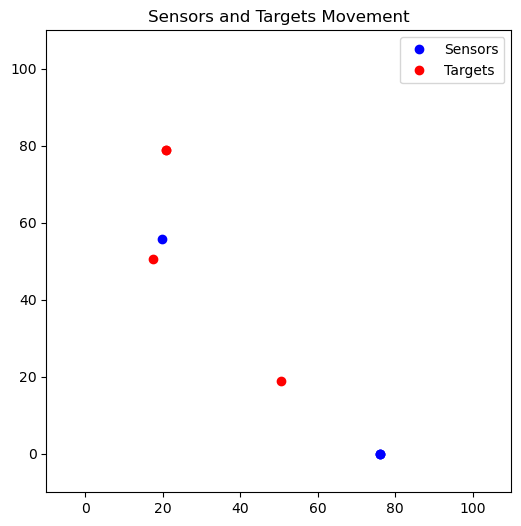

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-10, 110)
ax.set_ylim(-10, 110)
ax.set_title("Sensors and Targets Movement")

# Plot objects for sensors & targets
sensor_dots, = ax.plot([], [], 'bo', markersize=6, label="Sensors")  # Blue dots
target_dots, = ax.plot([], [], 'ro', markersize=6, label="Targets")  # Red dots

ax.legend()

def update(frame):
    """ Update function for animation """
    sensor_dots.set_data(sim.sensors_timestamps[:, frame, 0], sim.sensors_timestamps[:, frame, 1])  # Update sensor positions
    target_dots.set_data(sim.targets_timestamps[:, frame, 0], sim.targets_timestamps[:, frame, 1])  # Update target positions
    return sensor_dots, target_dots

# Create animation
ani = animation.FuncAnimation(fig, update, frames=sim.sensors_timestamps.shape[1], interval=10, blit=True)

ani.save("time_based_animation.gif", writer="pillow", fps=60)

In [7]:
import itertools

num = itertools.count()

for i in range(5):
    print(num)
    next(num)

AttributeError: module 'itertools' has no attribute 'counter'